### Klasyfikacja obrazów

**Zadanie klasyfikacyjne będzie polegało na rozpoznawaniu kotów, psów oraz pand.**

**Na początku wczytujemy niezbędne biblioteki.**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import smart_resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from skimage.transform import resize
import os 

**Wczytujemy teraz nasze obrazy i przyporządkowywujemy im kategorie.**

In [2]:
path = 'data/'

images = []
categories = []
width = 108
height = 108

for file in os.listdir(path):
    image_load = load_img(path + file)
    image = smart_resize(image_load, size = (height,width), interpolation = "nearest")
    images.append(image)
    if file.split('_')[0] == "cats":
        categories.append(0)
    elif file.split('_')[0] == "dogs":
        categories.append(1)
    elif file.split('_')[0] == "panda":
        categories.append(2)
#Sprawdzamy czy każdy obrazek ma przyporządkowaną kategorię
print(len(images))
print(len(categories))

3000
3000


**Dla każdej kategorii przedstawiony zostanie przykładowy obrazek.**

To jest kot.


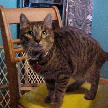

In [3]:
cat = array_to_img(images[0])
print("To jest kot.")
cat

To jest pies.


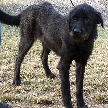

In [4]:
dog = array_to_img(images[1000])
print("To jest pies.")
dog

To jest panda.


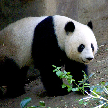

In [5]:
panda = array_to_img(images[2000])
print("To jest panda.")
panda

**Dzielmy naszą ramkę danych na zbiór uczący oraz zbiór testowy. Zbiór uczący będzie stanowić 4/5 wszystkich obserwacji.**

In [6]:
x,y = shuffle(images, categories, random_state = 10)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, random_state = 0)
xtrain = np.array(xtrain)
xtrain = xtrain / 255 #Normalizacja
ytrain = np.array(ytrain)
ytrain_categorical = to_categorical(ytrain) #Ustawienie kategorii
xtest = np.array(xtest)
xtest = xtest / 255 #Normalizacja
ytest = np.array(ytest)
ytest_categorical = to_categorical(ytest) #Ustawienie kategorii

**Przedstawione zostaną teraz parametry zbiorów na podstawie, których będziemy budować model klasyfikacyjny.**

In [7]:
print(xtrain.shape)
print('Zbiór xtrain zawiera 2000 obrazów zwierząt (koty, psy, pandy) o wymiarze 256x256 i głębokości 3.')

(2400, 108, 108, 3)
Zbiór xtrain zawiera 2000 obrazów zwierząt (koty, psy, pandy) o wymiarze 256x256 i głębokości 3.


In [8]:
print(ytrain.shape)
print('Zbiór ytrain zawiera 2000 wartości zmiennej wynikowej określającej kategorię obrazu (typ zwierzęcia).')

(2400,)
Zbiór ytrain zawiera 2000 wartości zmiennej wynikowej określającej kategorię obrazu (typ zwierzęcia).


In [9]:
print(xtest.shape)
print('Zbiór xtest zawiera 1000 obrazów zwierząt (koty, psy, pandy) o wymiarze 256x256 i głębokości 3.')

(600, 108, 108, 3)
Zbiór xtest zawiera 1000 obrazów zwierząt (koty, psy, pandy) o wymiarze 256x256 i głębokości 3.


In [10]:
print(ytest.shape)
print('Zbiór ytest zawiera 2000 wartości zmiennej wynikowej określającej kategorię obrazu (typ zwierzęcia).')

(600,)
Zbiór ytest zawiera 2000 wartości zmiennej wynikowej określającej kategorię obrazu (typ zwierzęcia).


### Budowa modelu klasyfikacyjnego 

**Rozpoczynamy budowę modelu klasyfikacyjnego.**

In [11]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [12]:
input_shape = xtrain.shape  
model.build(input_shape) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (2400, 106, 106, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (2400, 53, 53, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (2400, 53, 53, 32)        0         
                                                                 
 flatten (Flatten)           (2400, 89888)             0         
                                                                 
 dense (Dense)               (2400, 64)                5752896   
                                                                 
 dense_1 (Dense)             (2400, 3)                 195       
                                                        

**Podsumowanie naszego zbudowanego modelu.**

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
history_2 = model.fit(xtrain, ytrain_categorical, validation_data = (xtest, ytest_categorical), 
                      batch_size = 30, epochs = 10, verbose = 1,)

Epoch 1/10
80/80 [==============================] - 48s 532ms/step - loss: 1.4243 - accuracy: 0.5629 - val_loss: 0.7537 - val_accuracy: 0.6517
Epoch 2/10
80/80 [==============================] - 50s 631ms/step - loss: 0.6987 - accuracy: 0.6608 - val_loss: 0.6963 - val_accuracy: 0.6783
Epoch 3/10
80/80 [==============================] - 36s 447ms/step - loss: 0.5938 - accuracy: 0.7292 - val_loss: 0.7297 - val_accuracy: 0.6283
Epoch 4/10
80/80 [==============================] - 42s 527ms/step - loss: 0.5221 - accuracy: 0.7750 - val_loss: 0.6702 - val_accuracy: 0.6683
Epoch 5/10
80/80 [==============================] - 44s 548ms/step - loss: 0.4055 - accuracy: 0.8483 - val_loss: 0.6616 - val_accuracy: 0.6967
Epoch 6/10
80/80 [==============================] - 39s 492ms/step - loss: 0.3177 - accuracy: 0.8958 - val_loss: 0.6818 - val_accuracy: 0.6917
Epoch 7/10
80/80 [==============================] - 48s 598ms/step - loss: 0.2418 - accuracy: 0.9237 - val_loss: 0.7049 - val_accuracy: 0.6867

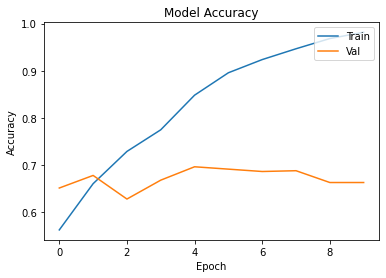

In [15]:
#Wykres dokładności
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

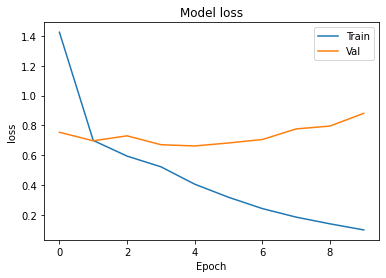

In [16]:
#Wykres funkcji straty
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

**Przeprowadzimy teraz predykcję dla obrazka, który nie pochodzi z naszego zbioru danych.**

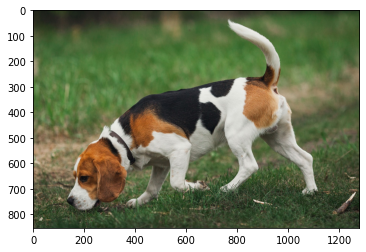

In [17]:
new_image = plt.imread('beaggle.jpg')
new_image_show = plt.imshow(new_image)

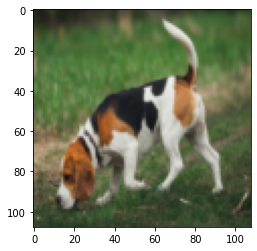

In [18]:
resized_image = resize(new_image, (108,108,3))
img_resize = plt.imshow(resized_image)

In [19]:
prediction = model.predict(np.array([resized_image]))
prediction

array([[0.01310689, 0.946912  , 0.03998112]], dtype=float32)

In [20]:
list_index = [0,1,2]
x = prediction
for i in range(3):
    for j in range(3):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp     

In [21]:
classes = ['Kot','Pies','Panda']
for i in range(3):
    print(classes[list_index[i]], ':', prediction[0][list_index[i]]*100,'%')

Pies : 94.69119906425476 %
Panda : 3.998112305998802 %
Kot : 1.3106892816722393 %
